<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.2.2 
# *Mining Social Media with Twitter*

## The Twitter API and Tweepy Package

The Twitter API provides access to tweets and comments, and allows an application to post tweets to the user's timeline. 

Twitter requires developers to create and authenticate an app before they can use the API.

### 1. Apply for Developer Access


Apply at https://developer.twitter.com/en/apply-for-access.html. Where asked state that you will use the app as a student to explore the tweepy Python library and use it to fetch recent tweets and to create/delete a tweet.

### 2. Create Your Twitter App
Go to https://developer.twitter.com/en/portal/projects-and-apps and click on the "+ New Project" button. Give your project a name, select Student as the use case and enter a brief project description. Then click on the "Create new" button to create a new App. Choose a "Development" app environment, give your app a name and you will be able to see your API Key, API Key Secret and Bearer Token. You will also be able to generate an Access Token and Secret. Copy-paste these authentication details for use in this lab.

### 3. Load Python Libraries

In [ ]:
!pip install tweepy
!pip install textblob

In [1]:
import tweepy
import json
import pprint
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

Ensure your version of tweepy is 4.5.0 or later:

In [2]:
tweepy.__version__

'4.5.0'

### 4. Authenticate from your Python script

You could assign your authentication details explicitly, as follows:

In [ ]:
bearer_token="" #your bearer token (string) goes in here
api_consumer_key = "" # your consumer key (string) goes in here
api_consumer_secret = "" # your consumer secret key (string) goes in here
access_token = ""  # your access token (string) goes in here
access_token_secret = ""  # your access token secret (string) goes in here

In [ ]:
client = tweepy.Client(
    bearer_token=bearer_token,
    consumer_key=api_consumer_key,
    consumer_secret=api_consumer_secret,
    access_token=access_token,
    access_token_secret=access_token_secret
)

In [ ]:
client.get_users_tweets('783214').data #Twitter's id

In [ ]:
auth_twitter_json = {
    'bearer_token': ''     # your bearer token (string) goes in here
    , 'consumer_key': ''      # your consumer key (string) goes in here
    , 'consumer_secret': ''   # your consumer secret key (string) goes in here
    , 'access_token': ''      # your access token (string goes in here
    , 'access_token_secret': ''  # your access token secret (string) goes in here
}

with open('auth_twitter.json', 'w') as outfile:  
    json.dump(auth_twitter_json, outfile)

A better way would be to store these details externally, so they are not displayed in the notebook:

- create a file called "auth_twitter.json" in your "notebooks" directory, and save your credentials there in JSON format:

`{`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`   "bearer_token": "your bearer token (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`   "consumer_key": "your consumer key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;` "consumer_secret": "your consumer secret key (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"access_token": "your access token (string) goes in here",` <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`"access_token_secret": "your access token secret (string) goes in here"` <br>
`}`

(Nb. Parsers are very fussy. Make sure each key:value pair has a comma after it except the last one!)  

Use the following code to load the credentials:  

In [ ]:
pwd()  # make sure your working directory is where the file is

In [ ]:
path_auth = 'auth_twitter.json'
auth = json.loads(open(path_auth).read())
pp = pprint.PrettyPrinter(indent=4)
# For debugging only:
pp.pprint(auth)

In [4]:
my_bearer_token = auth['bearer_token']
my_consumer_key = auth['consumer_key']
my_consumer_secret = auth['consumer_secret']
my_access_token = auth['access_token']
my_access_token_secret = auth['access_token_secret']

Security considerations: 
- this method only keeps your credentials invisible as long as nobody accesses this notebook while it's running on your computer 
- if you wanted another user to have access to the executable notebook without divulging your credentials you should set up an OAuth 2.0 workflow to let them obtain and apply their own API tokens when using your app
- if you just want to share your analyses, you could use a separate script (which you don't share) to fetch the data and save it locally, then use a second notebook (with no API access) to load and analyse the locally stored data

### 5. Exploring the API

Here is how to connect to Twitter using the Tweepy library:

In [5]:
client = tweepy.Client(
    bearer_token=my_bearer_token,
    consumer_key=my_consumer_key,
    consumer_secret=my_consumer_secret,
    access_token=my_access_token,
    access_token_secret=my_access_token_secret
)

In the next cell, put the cursor after the '.' and hit the [tab] key to see the available members and methods in the response object:

In [ ]:
client.

To obtain your followers, enter your Twitter id. An easy way to find this is via https://tweeterid.com/.

In [6]:
myid = '' #enter your id
followers = client.get_users_followers(id=myid)

In [ ]:
followers.data[0].#try id, name, username

You can enter a query such as the following to look up recent tweets based on a search string (excluding retweets).

In [7]:
query = 'winterolympics -is:retweet'

tweets = client.search_recent_tweets(query=query, tweet_fields=['context_annotations', 'created_at'],
                                     media_fields=['preview_image_url'], expansions='attachments.media_keys',
                                     max_results=100)

In [ ]:
tweets.data[0].

Consult the Tweepy and Twitter API documentation. Print a few of the response members below:

In [8]:
# Retrieve a Twitter user object
query = 'from:barackobama'
obama = client.search_recent_tweets(query=query, 
                                    tweet_fields=['attachments','author_id','context_annotations','created_at','entities','geo','id','in_reply_to_user_id','lang','possibly_sensitive','public_metrics','referenced_tweets','source','text','withheld'],
                                     max_results=10)

In [9]:
obama.data[0].data

{'source': 'Twitter Web App',
 'id': '1497243705165684744',
 'context_annotations': [{'domain': {'id': '10',
    'name': 'Person',
    'description': 'Named people in the world like Nelson Mandela'},
   'entity': {'id': '10038764303',
    'name': 'Barack Obama',
    'description': 'Former US President Barack Obama'}},
  {'domain': {'id': '10',
    'name': 'Person',
    'description': 'Named people in the world like Nelson Mandela'},
   'entity': {'id': '10040395078',
    'name': 'Joe Biden',
    'description': 'US President Joe Biden'}},
  {'domain': {'id': '10',
    'name': 'Person',
    'description': 'Named people in the world like Nelson Mandela'},
   'entity': {'id': '867883048867516416',
    'name': 'Stephen Breyer',
    'description': 'Stephen Breyer'}},
  {'domain': {'id': '35',
    'name': 'Politician',
    'description': 'Politicians in the world, like Joe Biden'},
   'entity': {'id': '10038764303',
    'name': 'Barack Obama',
    'description': 'Former US President Barack Ob

In [10]:
tweet_list = []
for tweet in obama.data:
    tweet_list.append(tweet.data)

In [11]:
df = pd.DataFrame(tweet_list)

In [12]:
df['created_at'] = pd.to_datetime(df['created_at'])
df.set_index('created_at', inplace=True)

In [13]:
df

,source,id,context_annotations,text,in_reply_to_user_id,entities,author_id,possibly_sensitive,public_metrics,lang,referenced_tweets,attachments
created_at,,,,,,,,,,,,
2022-02-25 16:14:51+00:00,Twitter Web App,1497243705165684744,"[{'domain': {'id': '10', 'name': 'Person', 'de...","Like Justice Breyer, Judge Jackson understands...",813286,"{'mentions': [{'start': 121, 'end': 127, 'user...",813286,False,"{'retweet_count': 1207, 'reply_count': 187, 'l...",en,"[{'type': 'replied_to', 'id': '149724370336627...",NaN
2022-02-25 16:14:50+00:00,Twitter Web App,1497243703366275081,"[{'domain': {'id': '10', 'name': 'Person', 'de...","As a protégé of Justice Breyer, Judge Jackson ...",813286,"{'annotations': [{'start': 16, 'end': 29, 'pro...",813286,False,"{'retweet_count': 1013, 'reply_count': 136, 'l...",en,"[{'type': 'replied_to', 'id': '149724370148303...",NaN
2022-02-25 16:14:50+00:00,Twitter Web App,1497243701483032576,"[{'domain': {'id': '10', 'name': 'Person', 'de...",I want to congratulate Judge Ketanji Brown Jac...,NaN,"{'urls': [{'start': 272, 'end': 295, 'url': 'h...",813286,False,"{'retweet_count': 6580, 'reply_count': 1099, '...",en,"[{'type': 'quoted', 'id': '1497225829566324741'}]",NaN
2022-02-24 20:36:34+00:00,Twitter Web App,1496947181214916614,"[{'domain': {'id': '10', 'name': 'Person', 'de...","Last night, Russia launched a brazen attack on...",NaN,"{'urls': [{'start': 210, 'end': 233, 'url': 'h...",813286,False,"{'retweet_count': 31114, 'reply_count': 9519, ...",en,NaN,{'media_keys': ['3_1496946822698442754']}
2022-02-23 22:45:31+00:00,Twitter for iPhone,1496617242406096898,"[{'domain': {'id': '10', 'name': 'Person', 'de...",Michelle and I were sad to hear about the pass...,NaN,"{'urls': [{'start': 164, 'end': 187, 'url': 'h...",813286,False,"{'retweet_count': 1095, 'reply_count': 403, 'l...",en,NaN,NaN
2022-02-22 21:52:02+00:00,Twitter Web App,1496241395174150144,"[{'domain': {'id': '10', 'name': 'Person', 'de...",I want to thank everyone who has joined @AllOn...,813286,"{'mentions': [{'start': 40, 'end': 53, 'userna...",813286,False,"{'retweet_count': 514, 'reply_count': 109, 'li...",en,"[{'type': 'replied_to', 'id': '149624139301832...",NaN
2022-02-22 21:52:01+00:00,Twitter Web App,1496241393018327044,"[{'domain': {'id': '123', 'name': 'Ongoing New...","And in Ohio, @AllOnTheLine held 139 training s...",813286,"{'urls': [{'start': 250, 'end': 273, 'url': 'h...",813286,False,"{'retweet_count': 460, 'reply_count': 96, 'lik...",en,"[{'type': 'replied_to', 'id': '149624138910493...",{'media_keys': ['3_1496239174927765505']}
2022-02-22 21:52:00+00:00,Twitter Web App,1496241389104939008,"[{'domain': {'id': '10', 'name': 'Person', 'de...","In North Carolina, Karla Icaza De Austin, an A...",813286,"{'urls': [{'start': 253, 'end': 276, 'url': 'h...",813286,False,"{'retweet_count': 251, 'reply_count': 18, 'lik...",en,"[{'type': 'replied_to', 'id': '149624138512040...",{'media_keys': ['3_1496238830462156808']}
2022-02-22 21:51:59+00:00,Twitter Web App,1496241385120407553,"[{'domain': {'id': '10', 'name': 'Person', 'de...","Since then, folks across the country have part...",813286,"{'mentions': [{'start': 138, 'end': 151, 'user...",813286,False,"{'retweet_count': 257, 'reply_count': 19, 'lik...",en,"[{'type': 'replied_to', 'id': '149624138214664...",NaN


The following few cells will fetch recent tweets from accounts you follow:

In [ ]:
users = client.get_users_following(id=myid, max_results = 1000, user_fields=['profile_image_url'])
print(len(users.data)) #number of accounts you follow

In [15]:
following_ids = []
for user in users.data:
    following_ids.append(user.id)

If you do not follow any accounts, create a list called following_ids with a list of ids of interest that can be looked up from https://tweeterid.com/.

In [ ]:
for f in following_ids[:10]: #the number 10 can be increased to show tweets from more accounts
    query = 'from:' + str(f) + ' -is:retweet'

# get max. 10 tweets from each account followed
    tweets = client.search_recent_tweets(query=query, 
                                    tweet_fields=['author_id', 'created_at'],
                                     max_results=10)
    if tweets.data is not None:
        for tweet in tweets.data:
            print(tweet.author_id, tweet.created_at, tweet.text)

In [ ]:
for tweet in tweets.data:
    print(tweet.created_at, tweet.text)

The request to see your own recent tweets is similar, but uses a single call to the `get_users_tweets` endpoint. Try this below:

In [ ]:
mytweets = client.get_users_tweets(id=myid, tweet_fields=['created_at'])

for tweet in mytweets.data:
    print(tweet.text)

Now, instead of printing the text of each tweet, print the `created_at` and `id` attributes:

In [ ]:
#ANSWER:

for tweet in mytweets.data:
    print(tweet.created_at)
    print(tweet.id)
    #print(tweet.text)

In [20]:
df.dtypes

source                 object
id                     object
context_annotations    object
text                   object
in_reply_to_user_id    object
entities               object
author_id              object
possibly_sensitive       bool
public_metrics         object
lang                   object
referenced_tweets      object
attachments            object
dtype: object

In [21]:
df['id'].resample('D').count()

created_at
2022-02-22 00:00:00+00:00    5
2022-02-23 00:00:00+00:00    1
2022-02-24 00:00:00+00:00    1
2022-02-25 00:00:00+00:00    3
Freq: D, Name: id, dtype: int64

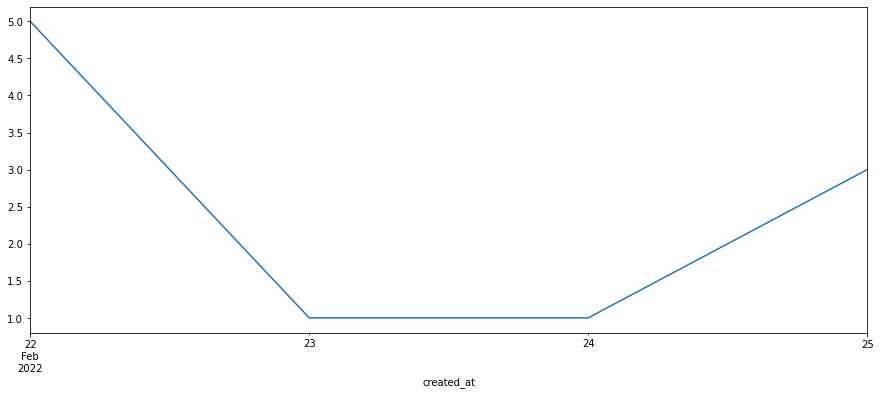

In [22]:
y = df['id'].resample('D').count()
y.plot(figsize=(15, 6));

In [23]:
from wordcloud import WordCloud, STOPWORDS

In [24]:
def check_tweets(twitter_handle):

    tweet_list = []
    query = 'from:' + twitter_handle
    recent_tweets = client.search_recent_tweets(query=query, tweet_fields=['created_at'], max_results=100)
                                     
    for tweet in recent_tweets.data:
        tweet_list.append(tweet.data)
    
    df = pd.DataFrame(tweet_list)
    df['created_at'] = pd.to_datetime(df['created_at'])
    df.set_index('created_at', inplace=True)
    
    y = df['id'].resample('D').count()
    y.plot(figsize=(15, 6))
    plt.show();

In [25]:
def check_tweets_wordcloud(twitter_handle, withall=True):

    tweet_list = []
    query = 'from:' + twitter_handle
    recent_tweets = client.search_recent_tweets(query=query, max_results=100)
    
    for tweet in recent_tweets.data:
        tweet_list.append(tweet.data)
    
    df = pd.DataFrame(tweet_list)
    
    if withall: 
        text = df.text.values
    else:
        text = ','.join([x for x in df.text.values])
        blob = TextBlob(text)
        text = blob.noun_phrases
    
    wordcloud = WordCloud(
        width = 3000
        , height = 2000
        , background_color = 'black'
        , stopwords = STOPWORDS
    ).generate(str(text))
    
    fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.show();

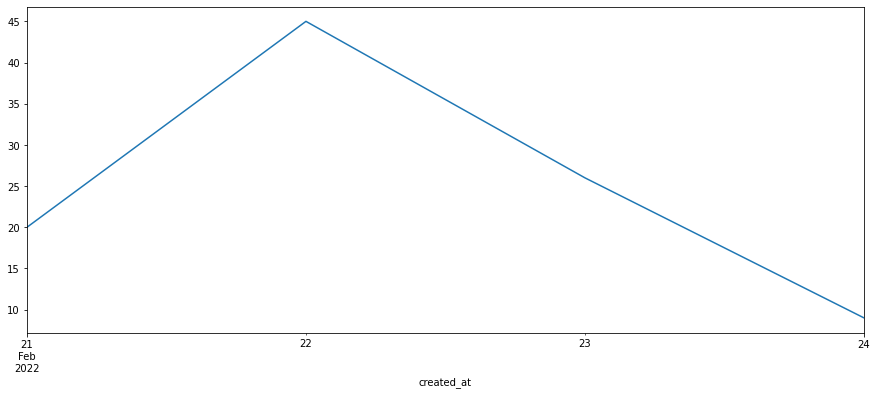

In [26]:
check_tweets('YouTube')

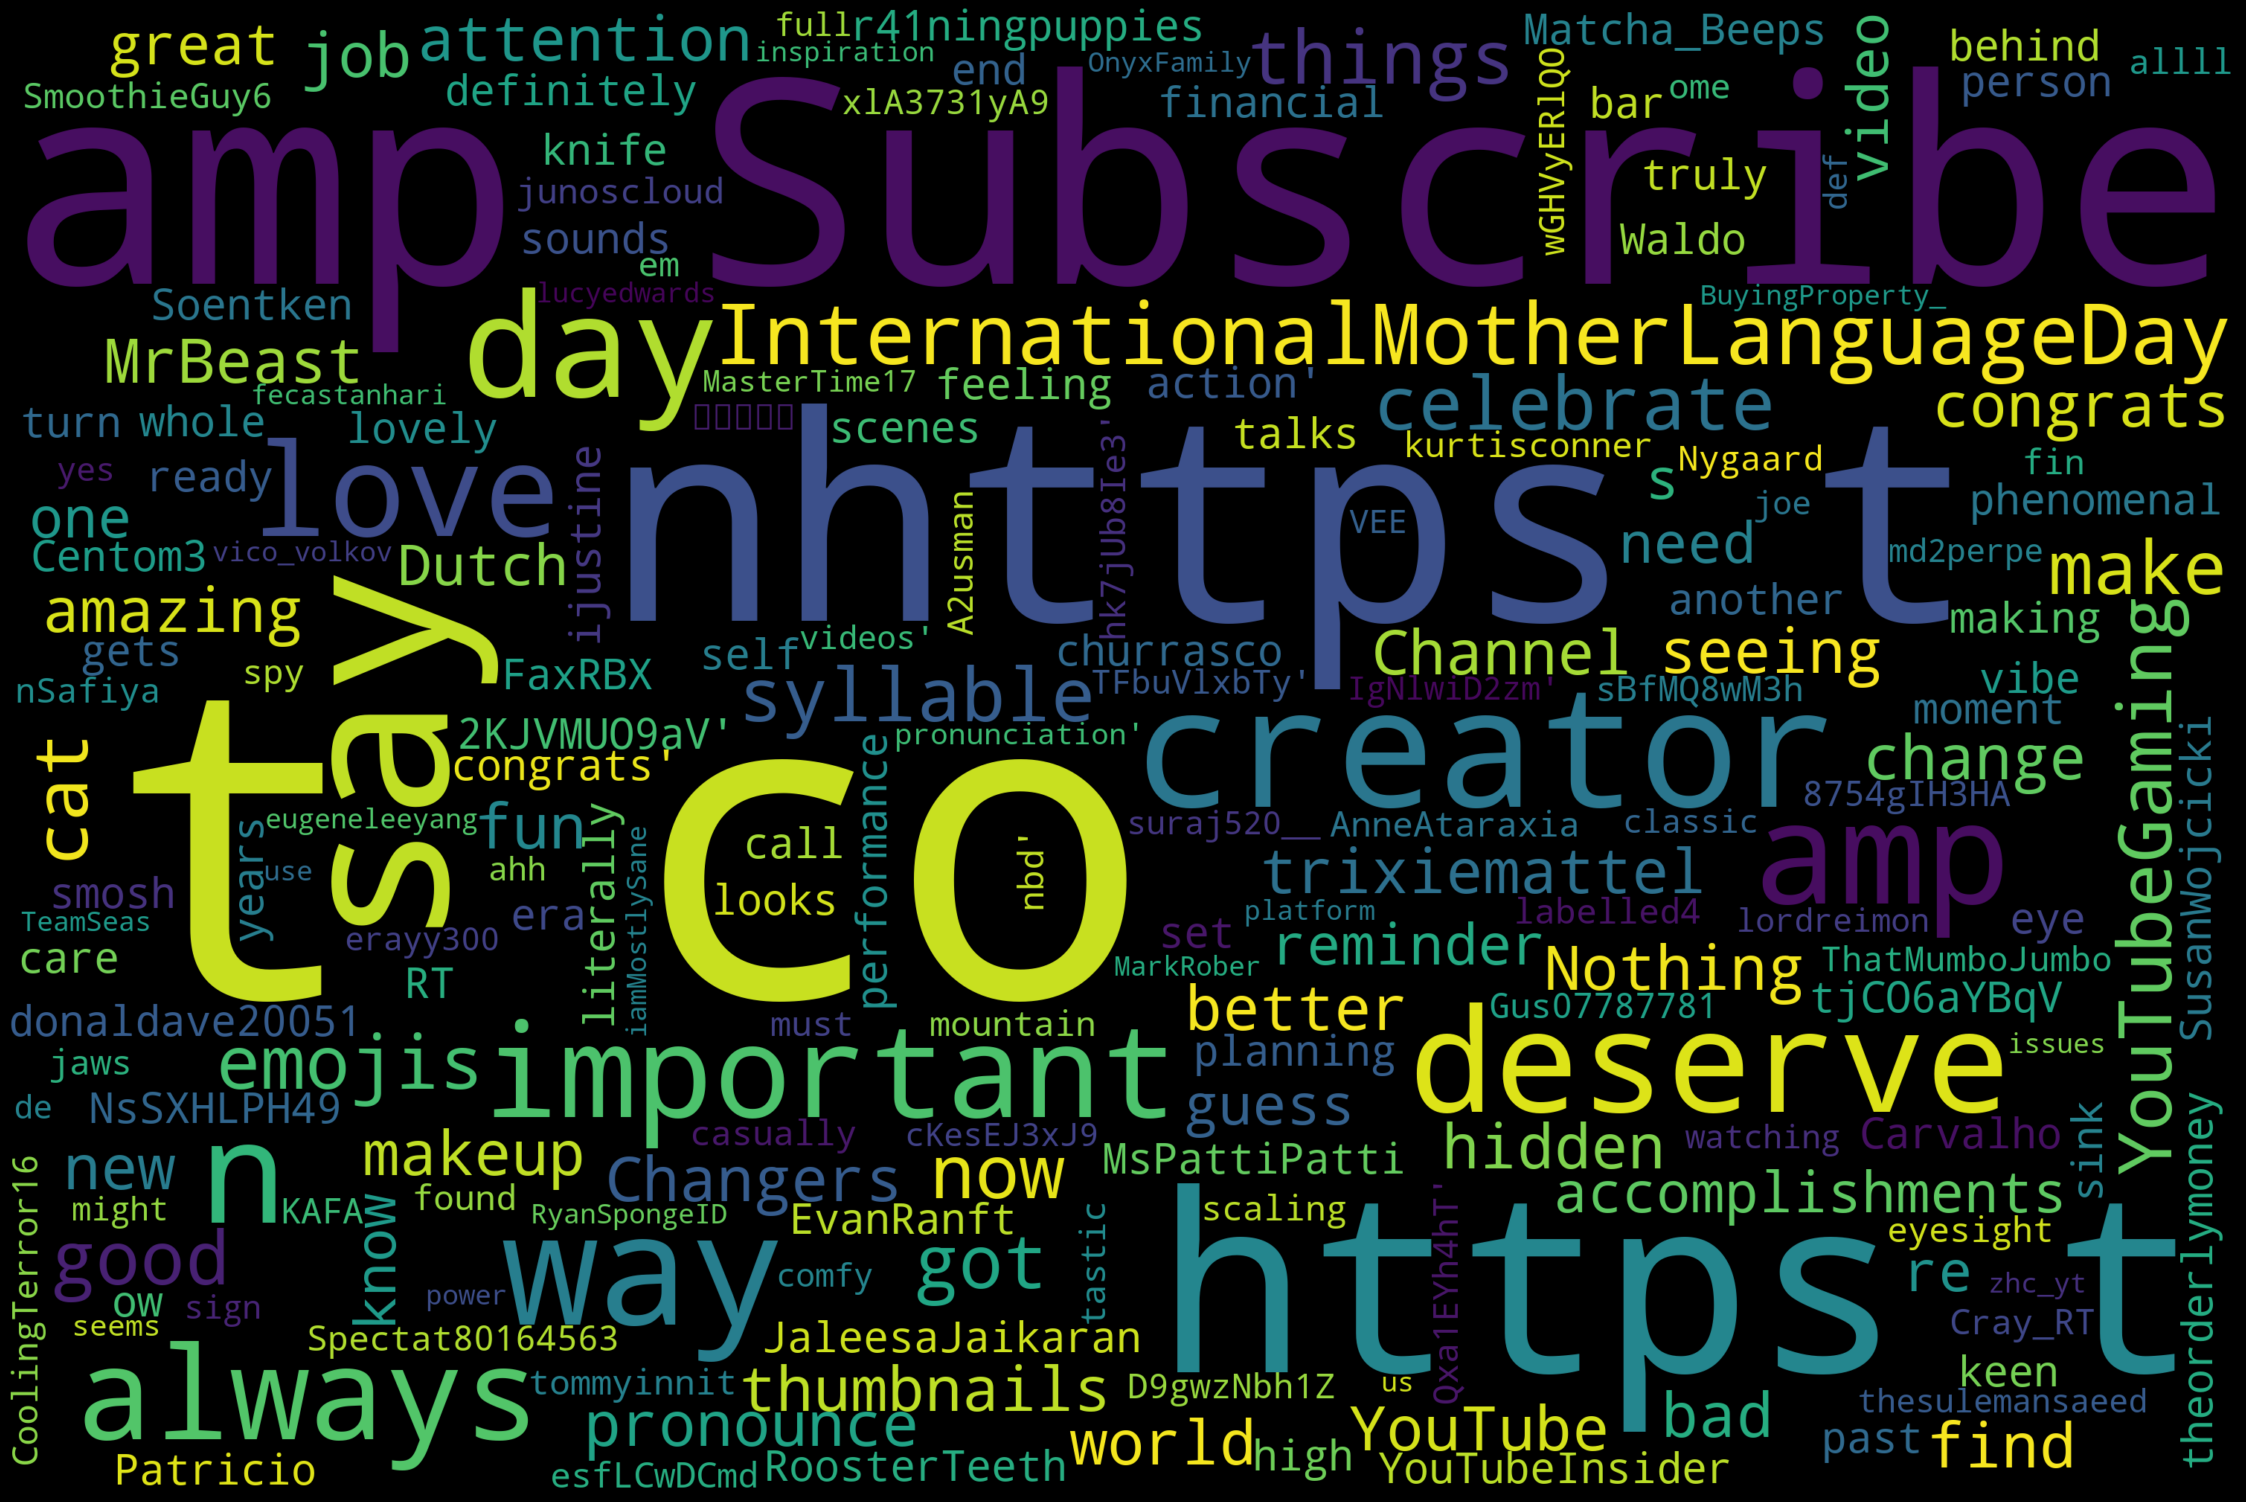

In [27]:
check_tweets_wordcloud('YouTube')

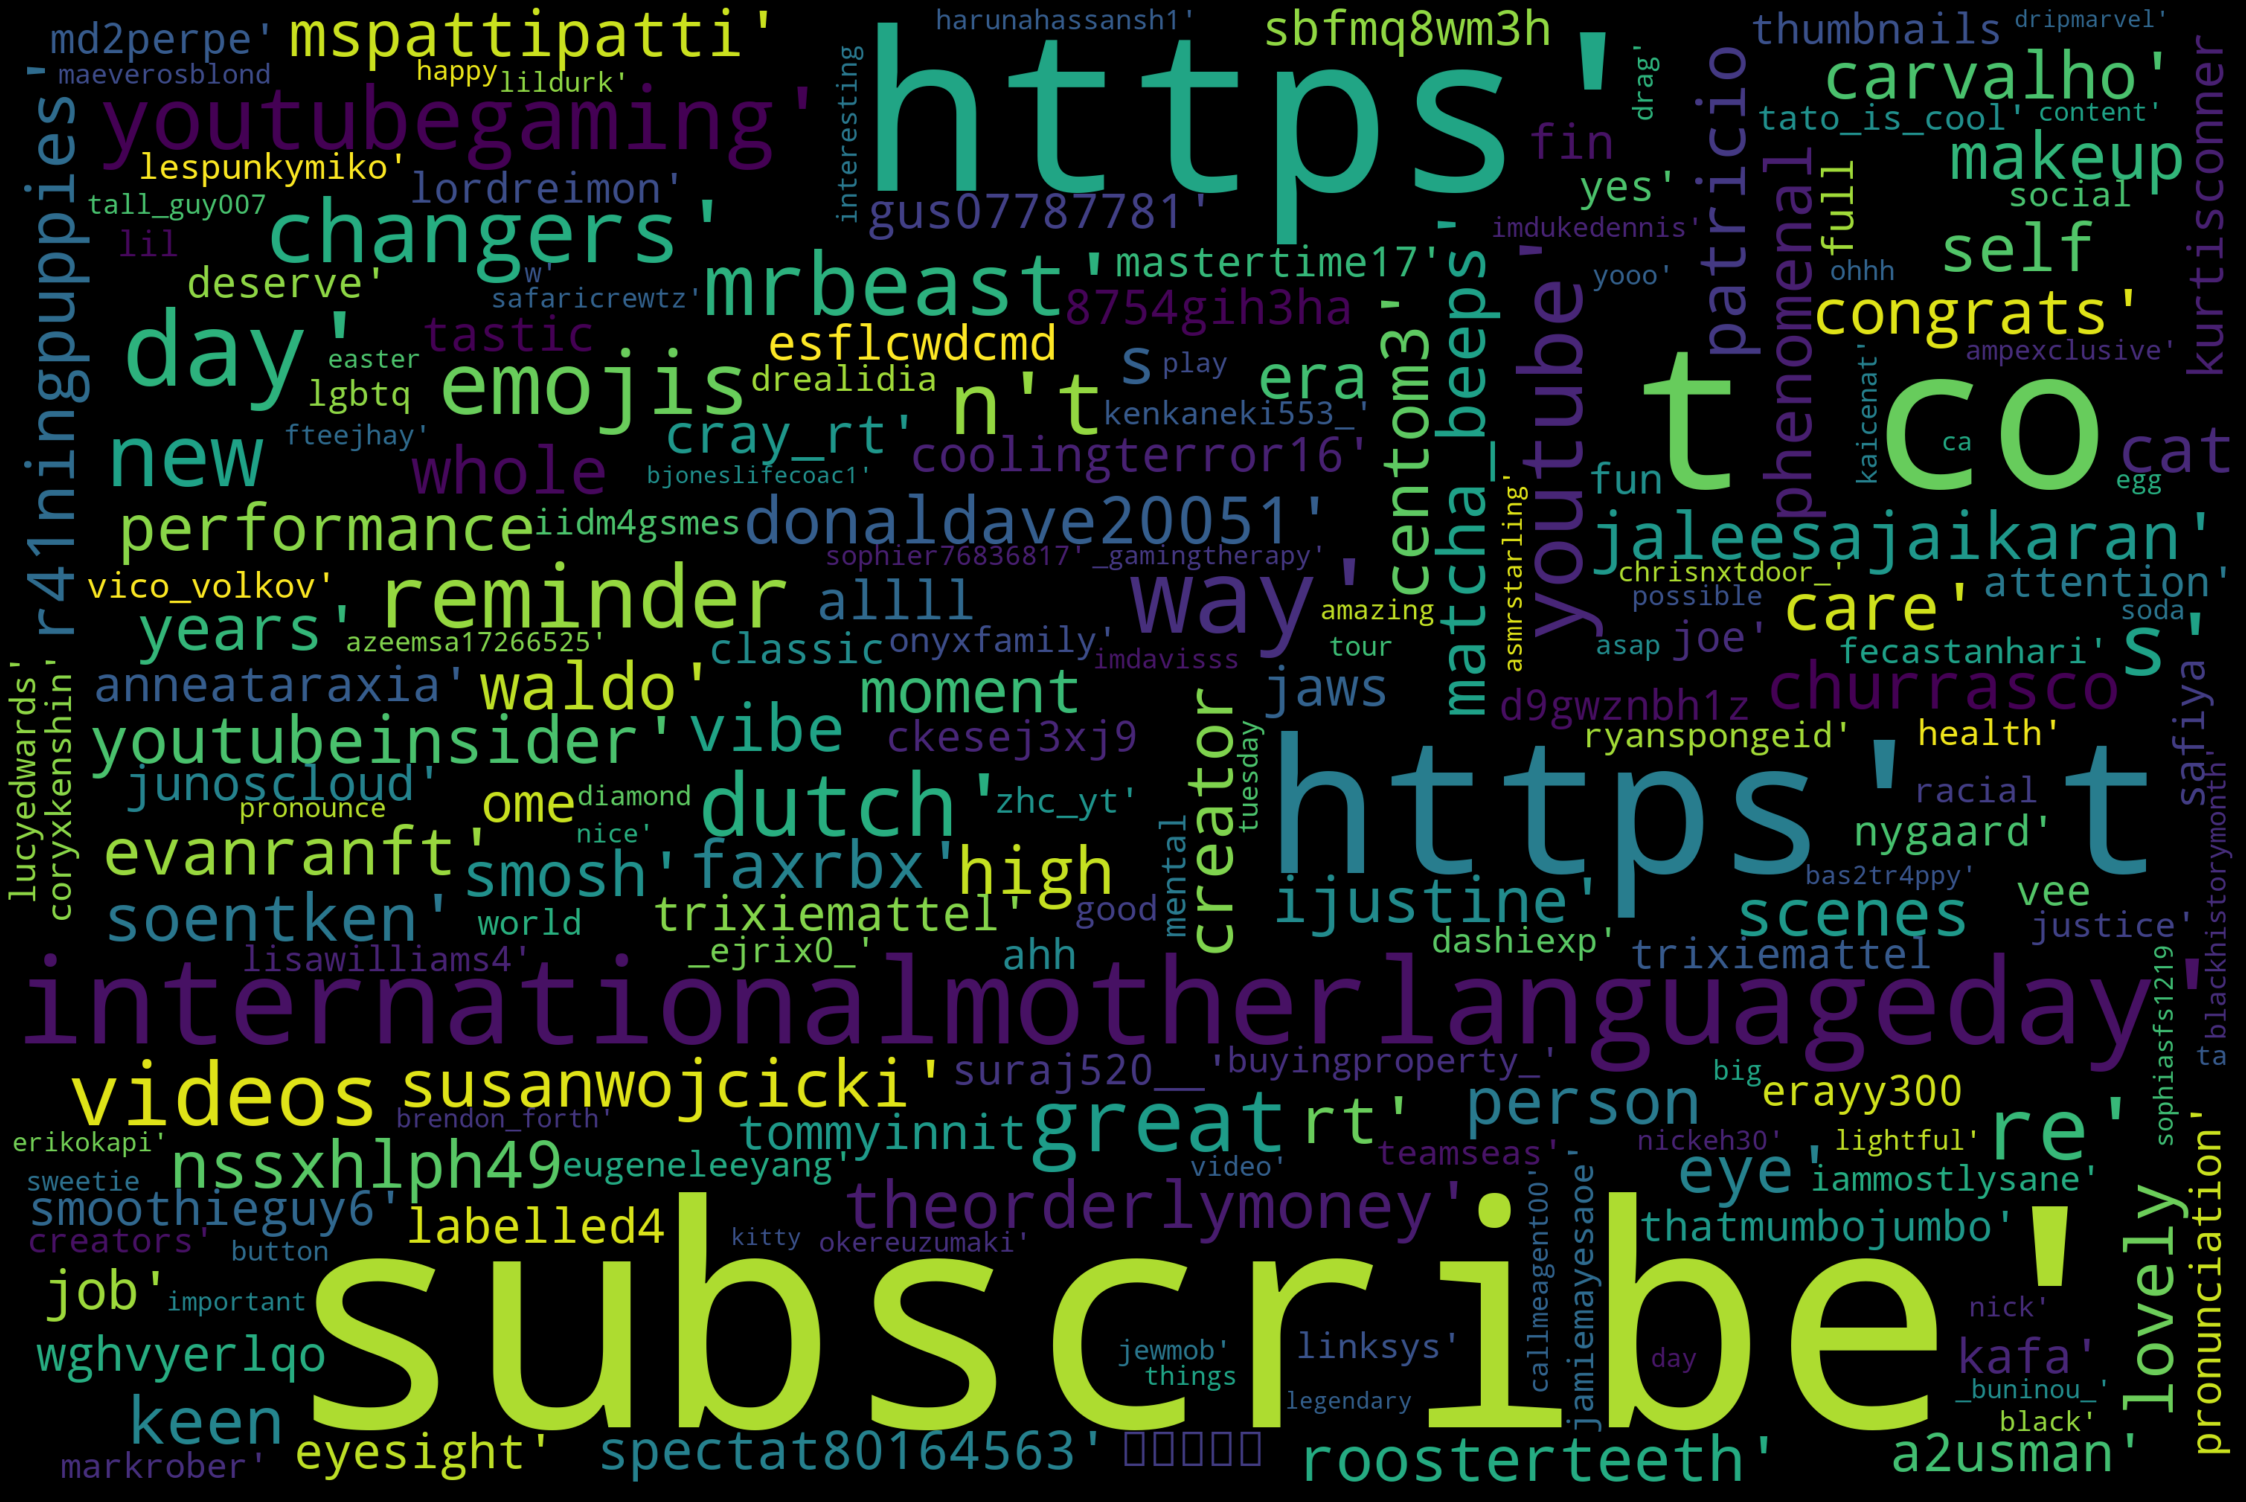

In [28]:
check_tweets_wordcloud('YouTube', withall=False)

You can create a tweet as follows:

In [ ]:
# create a tweet:
tweet = client.create_tweet(text='Test: Made with Tweepy')

(Nb. Don't abuse this feature! If you try to generate a zillion tweets in a loop, Twitter will ban your account.)

Tweets can be deleted by reference to their `id` attribute:

In [ ]:
tweet.data['id']

In [ ]:
# delete a tweet:
status = client.delete_tweet(tweet.data['id'])

You can follow a Tweeter:

In [ ]:
# follow:
client.follow_user('10228272') #YouTube

or unfollow:

In [ ]:
# unfollow:
client.unfollow_user('10228272')



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



